In [1]:
import json
from stereo_camera import *
import matplotlib.pyplot as plt

In [2]:
calibration_data = np.load('calibration_data.npz')
        
left_map_1 = calibration_data['left_map_1']
left_map_2 = calibration_data['left_map_2']
right_map_1 = calibration_data['right_map_1']
right_map_2 = calibration_data['right_map_2']
Q = calibration_data['Q']
print(Q)

with open('sbm_config.json') as sbm_config_file:
    sbm_config = json.load(sbm_config_file)
    sbm = create_SBM(sbm_config)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -1.53756018e+02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -1.20883785e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.20840104e+02]
 [ 0.00000000e+00  0.00000000e+00  1.53334276e-02 -0.00000000e+00]]


In [3]:
image_filename = 'test.jpg'
image_pair = cv2.imread(image_filename, cv2.IMREAD_COLOR)

In [4]:
_3dImage, disparity, _, _ = compute_3dImage(sbm, image_pair, left_map_1, left_map_2, right_map_1, right_map_2, Q)

In [5]:
_3dImage[140:145,125:130,2] # 0.75 m

array([[780.39075, 780.39075, 778.57587, 776.7695 , 776.7695 ],
       [778.57587, 778.57587, 778.57587, 776.7695 , 776.7695 ],
       [778.57587, 778.57587, 776.7695 , 774.9714 , 774.9714 ],
       [776.7695 , 776.7695 , 774.9714 , 773.1816 , 773.1816 ],
       [774.9714 , 773.1816 , 773.1816 , 773.1816 , 771.4001 ]],
      dtype=float32)

In [6]:
_3dImage[125:130,200:205,2] # 1.75 m

array([[1809.6628, 1819.498 , 1819.498 , 1829.4406, 1839.4924],
       [1809.6628, 1809.6628, 1819.498 , 1819.498 , 1839.4924],
       [1809.6628, 1809.6628, 1809.6628, 1819.498 , 1829.4406],
       [1809.6628, 1809.6628, 1809.6628, 1819.498 , 1829.4406],
       [1809.6628, 1809.6628, 1819.498 , 1819.498 , 1829.4406]],
      dtype=float32)

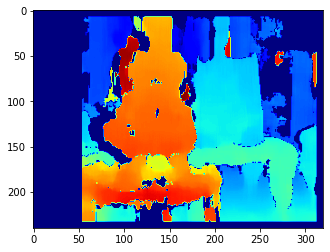

In [7]:
local_max = disparity.max()
local_min = disparity.min()
disparity_visual = (disparity-local_min)*(1.0/(local_max-local_min))
plt.imshow(disparity_visual, aspect='equal', cmap='jet')

In [8]:
left_camera_matrix = calibration_data['left_camera_matrix']
T = calibration_data['T']

f = left_camera_matrix[0,0]
b = -T[0]
print(f)
print(b)
safe_disparity = disparity
safe_disparity[safe_disparity == 0] = 0.1
safe_disparity[safe_disparity == -1] = 0.1

# Initialize the depth map to match the size of the disparity map
depth_map = np.ones(safe_disparity.shape, np.single)

# Calculate the depths 
depth_map[:] = f * b / safe_disparity[:]

316.5971767998715
[65.19242277]


In [9]:
depth_map[140:145,125:130] # 0.75 m

array([[769.7804 , 769.7804 , 767.99023, 766.2083 , 766.2083 ],
       [767.99023, 767.99023, 767.99023, 766.2083 , 766.2083 ],
       [767.99023, 767.99023, 766.2083 , 764.4347 , 764.4347 ],
       [766.2083 , 766.2083 , 764.4347 , 762.66925, 762.66925],
       [764.4347 , 762.66925, 762.66925, 762.66925, 760.912  ]],
      dtype=float32)

In [10]:
depth_map[125:130,200:205] # 1.75 m

array([[1785.0583, 1794.7598, 1794.7598, 1804.5671, 1814.4824],
       [1785.0583, 1785.0583, 1794.7598, 1794.7598, 1814.4824],
       [1785.0583, 1785.0583, 1785.0583, 1794.7598, 1804.5671],
       [1785.0583, 1785.0583, 1785.0583, 1794.7598, 1804.5671],
       [1785.0583, 1785.0583, 1794.7598, 1794.7598, 1804.5671]],
      dtype=float32)